# Import Library and setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("fetal_health.csv")

In [6]:
%matplotlib inline

# Import library for PCA

We will use sklearn for PCA analysis

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

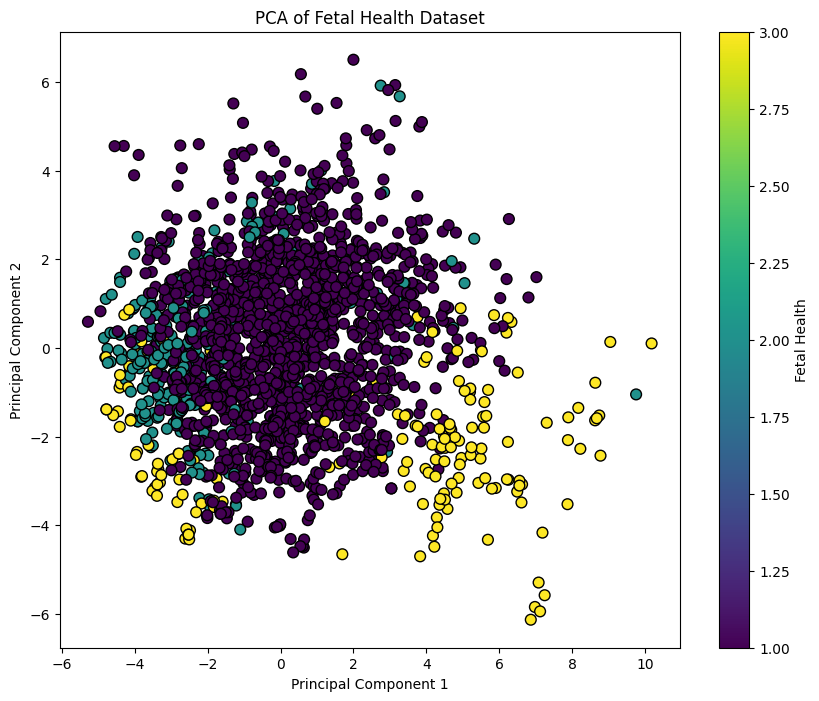

In [16]:
X = data.drop(columns=['fetal_health']) 
y = data['fetal_health'] 

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Using 2 components for 2D visualization
X_pca = pca.fit_transform(X_scaled)

# Combine PCA components with the target column
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['fetal_health'] = y.reset_index(drop=True)

# Visualize the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['fetal_health'], cmap='viridis', edgecolor='k', s=60)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fetal Health Dataset')
plt.colorbar(scatter, label='Fetal Health')
plt.show()

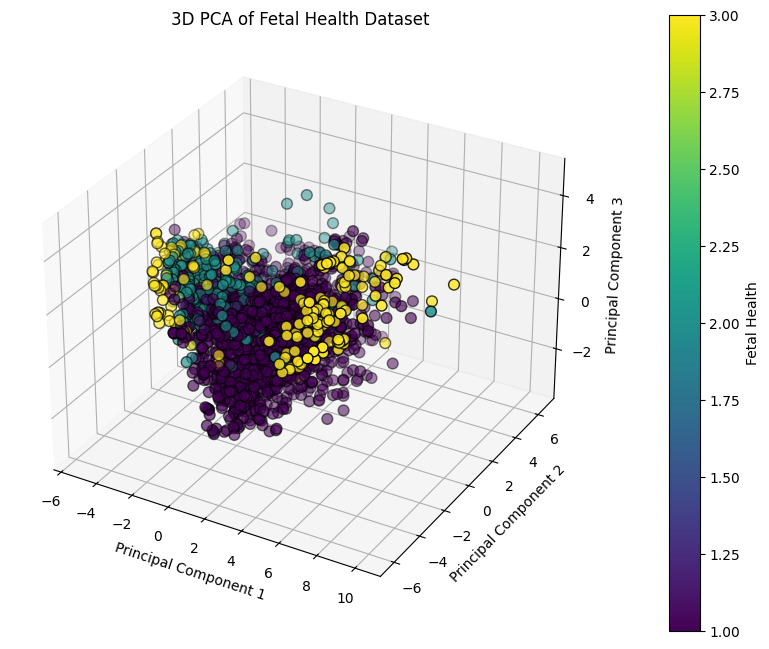

In [17]:
X = data.drop(columns=['fetal_health'])  # Features only
y = data['fetal_health']  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Combine PCA components with the target column
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['fetal_health'] = y.reset_index(drop=True)

# Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['fetal_health'], cmap='viridis', edgecolor='k', s=60)

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Fetal Health Dataset')

# Color bar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Fetal Health')

plt.show()